In [20]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

# set the seed for reproducibility
SEED = 42
np.random.seed(seed)

from utils import *
from algorithms import bfs, a_star
from gen import test, random_search, true_random_search, true_random_nsteps


In [21]:
env = gym.make(
    "MiniHack-ExploreMaze-Hard-Mapped-v0",
    observation_keys=("chars", "pixel"),
    #des_file = "simple_maze.des",
    max_episode_steps=10000
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|.           ..            .|                                                   
|.. ..... ..... . ..... ....|                                                   
|....   .   ..... .   .   ..|                                                   
|.... ... ..... . . . ......|                                                   
|.. . .   . ..> . . .     ..|                                                   
|@. ... ... ... ... . ... ..|                                                   
|..     .   ...     . . . ..|                                                   
|.. ....... ... ... ... ...

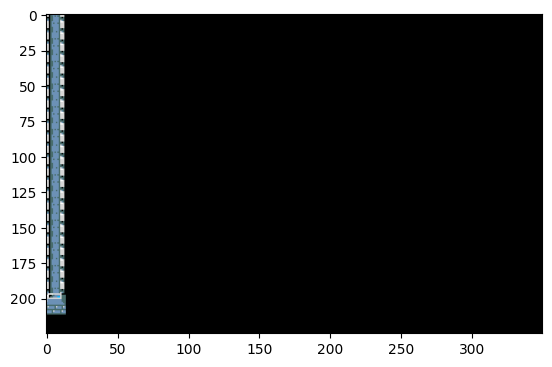

In [22]:
plt.imshow(state['pixel'][75:300, 450:800])

In [23]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [24]:
test()

test


In [25]:
path1 = random_search(game_map, start, target)
len(path1)

Target found!
target (8, 14)
target (7, 14)
target (6, 14)
target (5, 14)
target (4, 14)
target (4, 13)
target (5, 13)
target (5, 12)
target (6, 12)
target (7, 12)
target (7, 11)
target (7, 10)
target (8, 10)
target (9, 10)
target (9, 9)
target (9, 8)
target (10, 8)
target (11, 8)
target (11, 9)
target (11, 10)
target (12, 10)
target (13, 10)
target (13, 9)
target (13, 8)
target (14, 8)
target (15, 8)
target (15, 7)
target (15, 6)
target (14, 6)
target (13, 6)
target (13, 5)
target (13, 4)
target (13, 3)
target (13, 2)
target (12, 2)
target (11, 2)
target (10, 2)
target (9, 2)
target (8, 2)
target (7, 2)
target (7, 3)
target (7, 4)
target (8, 4)
target (9, 4)
target (9, 5)
target (9, 6)
target (8, 6)
target (7, 6)
target (7, 7)
target (7, 8)
target (6, 8)
target (5, 8)
target (5, 7)
target (5, 6)
target (5, 5)
target (5, 4)
target (6, 4)
target (6, 3)
target (6, 2)
target (5, 2)
target (5, 1)
target (6, 1)
target (7, 1)
target (8, 1)
target (9, 1)


65

In [26]:
path = true_random_nsteps(game_map, start, target)
len(path)

101

In [27]:
path

[(9, 1),
 (8, 1),
 (7, 1),
 (6, 1),
 (6, 2),
 (5, 2),
 (5, 1),
 (4, 1),
 (5, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (5, 1),
 (5, 2),
 (5, 1),
 (5, 2),
 (5, 1),
 (5, 2),
 (5, 1),
 (6, 1),
 (5, 1),
 (4, 1),
 (5, 1),
 (5, 2),
 (5, 1),
 (4, 1),
 (5, 1),
 (4, 1),
 (5, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (8, 2),
 (9, 2),
 (8, 2),
 (7, 2),
 (6, 2),
 (6, 3),
 (6, 4),
 (5, 4),
 (5, 5),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (6, 8),
 (5, 8),
 (6, 8),
 (7, 8),
 (7, 7),
 (7, 8),
 (7, 7),
 (7, 6),
 (7, 7),
 (7, 6),
 (7, 7),
 (7, 6),
 (8, 6),
 (9, 6),
 (9, 5),
 (9, 6),
 (9, 5),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 5),
 (9, 4),
 (9, 5),
 (9, 4),
 (9, 5),
 (9, 6),
 (8, 6),
 (7, 6),
 (8, 6),
 (9, 6),
 (9, 5),
 (9, 6),
 (8, 6),
 (9, 6),
 (8, 6),
 (9, 6),
 (9, 5),
 (9, 6),
 (9, 5),
 (9, 4),
 (8, 4),
 (9, 4),
 (9, 5),
 (9, 4),
 (9, 5),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 5),
 (9, 6),
 (9, 5)]

In [28]:
# print last element of path
path[-1]

(9, 5)

In [29]:
target

(8, 14)

In [30]:
# this is manhattan distance from the last element of the path to the target
fitness_function = lambda path: abs(path[-1][0] - target[0]) + abs(path[-1][1] - target[1])

MAX_GENERATIONS = 100
MAX_INDIVIDUALS = 100

scores =[]

individuals = [true_random_nsteps(game_map, start, target) for _ in range(MAX_INDIVIDUALS)]
fitnesses = [fitness_function(individual) for individual in individuals]

# create a list of tuples (individual, fitness)
population = list(zip(individuals, fitnesses))

# sort the population by fitness
population.sort(key=lambda x: x[1])
best_individuals = population[:MAX_INDIVIDUALS]


# print best path
print("best score:", best_individuals[0][1])
print("best path:", best_individuals[0][0])

#best_path

best score: 6
best path: [(9, 1), (10, 1), (11, 1), (11, 2), (12, 2), (11, 2), (11, 1), (11, 2), (12, 2), (13, 2), (13, 3), (13, 4), (13, 5), (13, 6), (14, 6), (15, 6), (15, 5), (15, 6), (15, 7), (15, 8), (15, 7), (15, 8), (14, 8), (13, 8), (14, 8), (13, 8), (13, 9), (13, 8), (14, 8), (15, 8), (15, 7), (15, 8), (14, 8), (13, 8), (13, 9), (13, 8), (14, 8), (13, 8), (14, 8), (15, 8), (14, 8), (13, 8), (13, 9), (13, 10), (13, 9), (13, 8), (14, 8), (15, 8), (14, 8), (15, 8), (14, 8), (13, 8), (14, 8), (13, 8), (13, 9), (13, 10), (12, 10), (11, 10), (12, 10), (13, 10), (12, 10), (11, 10), (11, 9), (11, 10), (11, 9), (11, 8), (10, 8), (9, 8), (10, 8), (11, 8), (11, 7), (11, 6), (11, 7), (11, 6), (11, 7), (11, 6), (11, 5), (11, 4), (11, 5), (11, 4), (11, 5), (11, 6), (11, 7), (11, 6), (11, 7), (11, 8), (10, 8), (9, 8), (10, 8), (9, 8), (9, 9), (9, 8), (10, 8), (9, 8), (9, 9), (9, 8), (9, 9), (9, 8), (10, 8), (9, 8), (9, 9)]


In [31]:
actions = actions_from_path(start, best_individuals[0][0][1:])
len(actions)

100

In [32]:
len(path)

101

In [33]:
"""image = plt.imshow(game[75:300, 450:800])

for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])"""

"image = plt.imshow(game[75:300, 450:800])\n\nfor action in actions:\n    s, _, _, _ = env.step(action)\n    display.display(plt.gcf())\n    display.clear_output(wait=True)\n    image.set_data(s['pixel'][75:300, 450:800])"

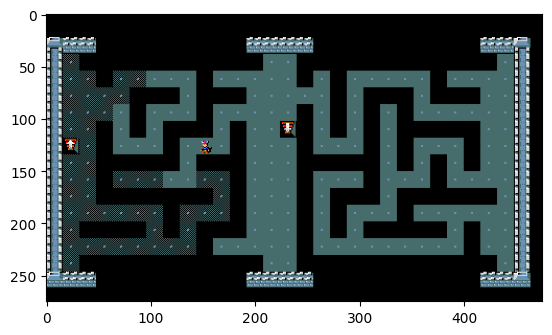

In [34]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])